# Task 2: Regression Problem 
"CA_housing Data Set"

    source: ca_housing.xlsx

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('ca_housing.xlsx')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.apply(lambda x:len(x.unique()))

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1924
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
import seaborn as sns
sns.catplot('ocean_proximity',kind = 'count',data = df,aspect =3)

/Users/pradee/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


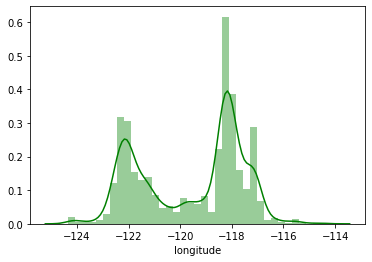

In [9]:
sns.distplot(df['longitude'],color='g')

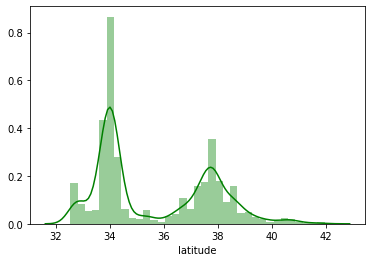

In [10]:
sns.distplot(df['latitude'],color='g')

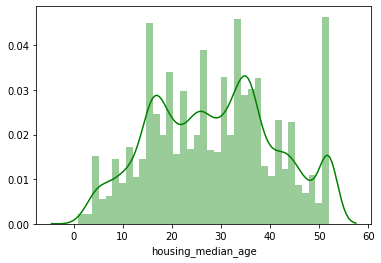

In [11]:
sns.distplot(df['housing_median_age'],color='g')

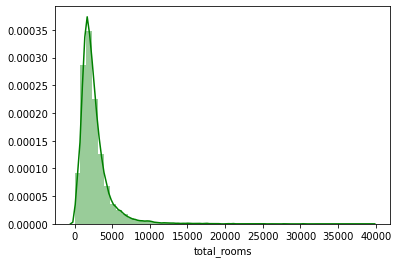

In [12]:
sns.distplot(df['total_rooms'],color='g')

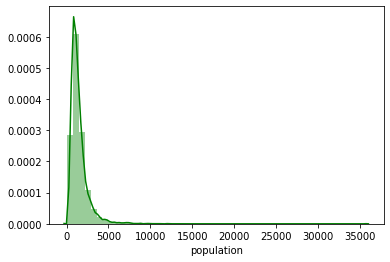

In [13]:
sns.distplot(df['population'],color='g')

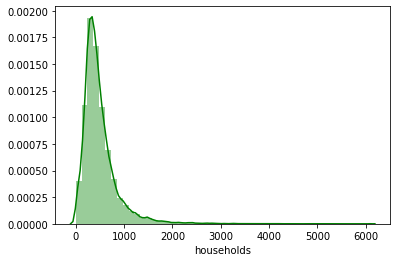

In [14]:
sns.distplot(df['households'],color='g')

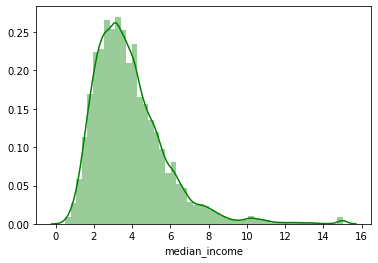

In [15]:
sns.distplot(df['median_income'],color='g')

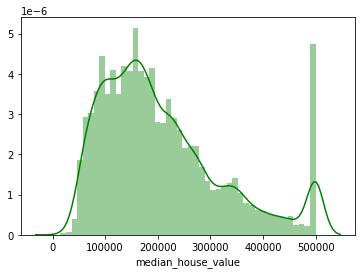

In [16]:
sns.distplot(df['median_house_value'],color='g')

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['ocean_proximity']=le.fit_transform(df['ocean_proximity'])

In [18]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3


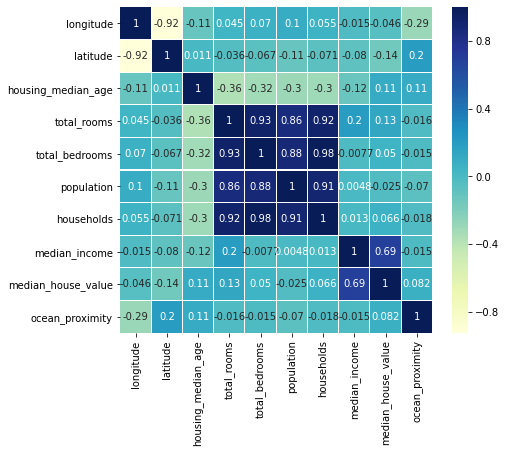

In [19]:
#correlation_matrix
import matplotlib.pyplot as plt
corr_m = df.corr() 
f, ax = plt.subplots(figsize =(7,6)) 
sns.heatmap(corr_m,annot=True, cmap ="YlGnBu", linewidths = 0.1) 

In [20]:
#missing values
df['total_bedrooms'] = df['total_bedrooms'].fillna((df['total_bedrooms'].median()))

In [21]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [22]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3


In [23]:
#model_check_1
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

In [24]:
X=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
L_R= LinearRegression()
L_R.fit(X_train,y_train)
y_pred=L_R.predict(X_test)
r2scores= r2_score(y_test,y_pred)
print("r2scores : ",r2scores)
L_R.score(X_train,y_train),L_R.score(X_test,y_test)
print(L_R.intercept_)

r2scores :  0.6436930708264934
-3574386.7758711176


In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3


In [26]:
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [27]:
x=df.columns

In [28]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
for i in x:
    df[i] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[i])))

In [29]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.75,0.043512
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.75,0.038224
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.75,0.052756
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.75,0.035241
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.75,0.038534


In [30]:
#model_1
X=df.drop(['median_house_value','total_rooms'],axis=1)
y=df['median_house_value']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
L_R= LinearRegression()
L_R.fit(X_train,y_train)
y_pred=L_R.predict(X_test)
r2scores= r2_score(y_test,y_pred)
print("r2scores : ",r2scores)

r2scores :  0.6425062976034839


In [31]:
#rmse(L_R)
mse1=mean_squared_error(y_test,y_pred)
L_R_score=np.sqrt(mse1)
L_R_score

0.14177729487105578

In [32]:
#model_2
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred2=rf.predict(X_test)
mse2=mean_squared_error(y_test,y_pred2)
rf_score=np.sqrt(mse2)
rf_score

0.10015881120122412

In [33]:
r2scores_2= r2_score(y_test,y_pred2)
r2scores_2

0.8215841856081818

In [34]:
#model_3 (additional)
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
y_pred4= rr.predict(X_test)
mse_3=mean_squared_error(y_test,y_pred4)
rid_score=np.sqrt(mse_3)
print(rid_score)
r2scores_3=r2_score(y_test, y_pred4)
print(r2scores_3)

0.14178178665556354
0.6424836450325948


# Final Results 

In [35]:
F_scores = {'Model':  ['Linear_Regression', 'RandomForest_Regressor','Ridge'],
            'MSE': [mse1,mse2,mse_3],
            'RMSE': [L_R_score, rf_score,rid_score ],
            'R2': [r2scores,r2scores_2,r2scores_3]}

In [36]:
df_scores = pd.DataFrame (F_scores, columns = ['Model','MSE','RMSE','R2'])
df_scores

,Model,MSE,RMSE,R2
0,Linear_Regression,0.020101,0.141777,0.642506
1,RandomForest_Regressor,0.010032,0.100159,0.821584
2,Ridge,0.020102,0.141782,0.642484


In [37]:
print(df_scores.to_markdown(tablefmt="grid"))

+----+------------------------+-----------+----------+----------+
|    | Model                  |       MSE |     RMSE |       R2 |
+====+========================+===========+==========+==========+
|  0 | Linear_Regression      | 0.0201008 | 0.141777 | 0.642506 |
+----+------------------------+-----------+----------+----------+
|  1 | RandomForest_Regressor | 0.0100318 | 0.100159 | 0.821584 |
+----+------------------------+-----------+----------+----------+
|  2 | Ridge                  | 0.0201021 | 0.141782 | 0.642484 |
+----+------------------------+-----------+----------+----------+


- Random Forest Regressor performs best compared to other 2 models with r-squared 82% 

# Thank you

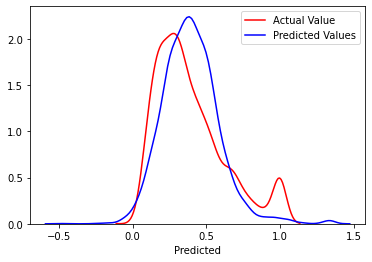

In [38]:
#Additional graphs to compare actual vs predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ax1 = sns.distplot(df1['Actual'], hist=False, color="red", label="Actual Value")
sns.distplot(df1['Predicted'], hist=False, color="blue", label="Predicted Values" , ax=ax1)

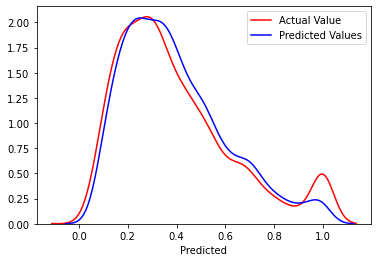

In [39]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
ax1 = sns.distplot(df2['Actual'], hist=False, color="red", label="Actual Value")
sns.distplot(df2['Predicted'], hist=False, color="blue", label="Predicted Values" , ax=ax1)

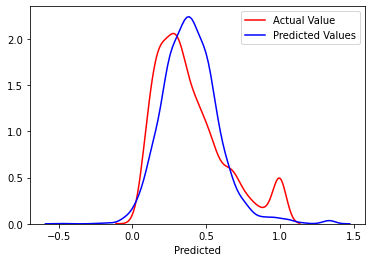

In [40]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
ax1 = sns.distplot(df3['Actual'], hist=False, color="red", label="Actual Value")
sns.distplot(df3['Predicted'], hist=False, color="blue", label="Predicted Values" , ax=ax1)